<a href="https://colab.research.google.com/github/Abdul-muizz/Abdul-Muizz.github.io/blob/main/30_Training_DNN_on_USB_IDS2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchinfo

In [ ]:
import datetime
import pandas as pd
from sklearn import tree
import time
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import preprocessing
import sklearn as sk
from sklearn.linear_model import LogisticRegression
import os
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import pandas as pd

from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras import utils as np_utils
# from keras.layers.merge import concatenate
#from keras.layers.normalization import BatchNormalization
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from keras.layers import Conv1D, MaxPooling1D, Flatten, Reshape
import matplotlib.pyplot as plt

# from keras.layers.wrappers import TimeDistributed

import keras
from sklearn import preprocessing
import tensorflow as tf
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import imblearn
from imblearn.under_sampling import RandomUnderSampler

import random
import time
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
from sklearn.metrics import classification_report, cohen_kappa_score
from sklearn.metrics import precision_score, recall_score, f1_score
from torchinfo import summary
from sklearn.metrics import classification_report, confusion_matrix

from google.colab import drive
drive.mount("/content/drive", force_remount=True)
%cd /content/drive/MyDrive
!pwd

Mounted at /content/drive
/content/drive/MyDrive
/content/drive/My Drive


In [ ]:
#code to get the paths of files in my drive
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Computer_Organization_Unit_4_JWFILES.pdf
/content/drive/MyDrive/COunit5_JWFILES.pdf
/content/drive/MyDrive/Computer_Organization_Unit_3_JWFILES.pdf
/content/drive/MyDrive/exchangeminmmax.c
/content/drive/MyDrive/KELANI ABDUL MUIZZ OLAMILEKAN ADMISSION LETTER (CSE).jpg
/content/drive/MyDrive/IMG-20170512-WA0020.jpg
/content/drive/MyDrive/ITN_T-hub.rar
/content/drive/MyDrive/The Failure List.pdf
/content/drive/MyDrive/img081.jpg
/content/drive/MyDrive/123.doc
/content/drive/MyDrive/Curriculum Vitae (2).pdf
/content/drive/MyDrive/Curriculum Vitae.pdf
/content/drive/MyDrive/Full page print.pdf
/content/drive/MyDrive/Task_1_Queries.sql
/content/drive/MyDrive/Task_2_Query.sql
/content/drive/MyDrive/Task_3_Query.sql
/content/drive/MyDrive/Task_4_Query.sql
/content/drive/MyDrive/Task_5_conf.txt
/content/drive/MyDrive/Task 1 response 1.ssmssqlproj
/content/drive/MyDrive/Task 1 response 2.ssmssln
/content/drive/MyDrive/Task 2 response.ssmssln
/content/drive/MyDrive/Task 3 

In [ ]:
# de1= pd.read_csv('/content/drive/MyDrive/USB-IDS Datasets/Hulk-Reqtimeout.csv')
# de2= pd.read_csv('/content/drive/MyDrive/USB-IDS Datasets/REGULAR.csv')
# de3= pd.read_csv('/content/drive/MyDrive/USB-IDS Datasets/TCPFlood-NoDefense.csv')
# de4= pd.read_csv('/content/drive/MyDrive/USB-IDS Datasets/TCPFlood-Reqtimeout.csv')
# de5= pd.read_csv('/content/drive/MyDrive/USB-IDS Datasets/TCPFlood-Evasive.csv')

In [ ]:
# merge_data_2021= pd.concat([de1,de2,de3,de4,de5])

In [ ]:
# merge_data_2021.to_csv('merge_data_2021.to_csv', index=False)

In [ ]:
#db1 = pd.read_csv('Monday-WorkingHours.csv', sep=',')
db2 = pd.read_csv('/content/drive/MyDrive/Revised_2021_Dataset.csv')
# db2 = merge_data_2021
#del db2['Dst Port'], db2['Timestamp'], db2['Fwd PSH Flags'], db2['Bwd PSH Flags'], db2['Fwd URG Flags'] , db2['Bwd URG Flags'], db2['Flow Byts/s'], db2['Flow Pkts/s'], db2['Protocol'], db2['Flow Duration']
del db2['Flow ID'], db2['Src IP'],db2['Dst IP'],db2['Timestamp']
#db3 = pd.read_csv('Wednesday-workingHours.pcap_ISCX.csv', sep=',')
#db4 = pd.read_csv('Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', sep=',')
#db4 = pd.read_csv('Thursday-WorkingHours.csv', sep=',')
#db5 = pd.read_csv('Friday-WorkingHours.csv', sep=',')
#db7 = pd.read_csv('Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', sep=',')
#db8 = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', sep=',')
#full_db = pd.concat([db1, db2, db3, db4, db5, db6, db7, db8])

#print(full_db.shape, full_db[' Label'].value_counts())
#print(100*full_db[' Label'].value_counts(normalize=True))
print(db2.shape, db2['Label'].value_counts())
print(100*db2['Label'].value_counts(normalize=True))

(370067, 80) Hulk-Reqtimeout           142196
Hulk-Evasive              125744
BENIGN                     50716
TCPFlood-Evasive           50278
Slowhttptest-NoDefense      1133
Name: Label, dtype: int64
Hulk-Reqtimeout           38.424393
Hulk-Evasive              33.978712
BENIGN                    13.704545
TCPFlood-Evasive          13.586188
Slowhttptest-NoDefense     0.306161
Name: Label, dtype: float64


In [ ]:
db2.columns

Index(['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Total Fwd Packet',
       'Total Bwd packets', 'Total Length of Fwd Packet',
       'Total Length of Bwd Packet', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN

In [ ]:
#columns_to_drop = ['Dst Port','Protocol',
                  #  'Timestamp',
                  #  'Fwd PSH Flags',
                  #  'Bwd PSH Flags',
                  #  'Fwd URG Flags',
                  #  'Bwd URG Flags',
                  #  'Flow Byts/s',
                  #  'Flow Pkts/s',
                  #  'Flow Duration'
                  #  ]

In [ ]:
#df = df.drop(columns=columns_to_drop)

In [ ]:
def preprocessing1(df, vs):
    min_max_scaler = MinMaxScaler()
    le = preprocessing.LabelEncoder()

    #train1, test = train_test_split(df, test_size=ts, random_state=0) #if I wanted to create a seperate test case
    train, val = train_test_split(df, test_size=vs, random_state=0)

    X1 = train.iloc[:,:-1]
    y1 = train.iloc[:,-1]  #would give the last column, the column represent give me all the rows of the last column
    X2 = val.iloc[:,:-1]
    y2 = val.iloc[:,-1]

    X1 = X1.to_numpy()
    y1 = y1.to_numpy()
    X2 = X2.to_numpy()
    y2 = y2.to_numpy()

    y1=le.fit_transform(y1)  #Trnaforming from cathegorical to numerical
    y2=le.fit_transform(y2)

    y1=y1.astype('int') #Converting to Integer
    y2=y2.astype('int')

    X1 = min_max_scaler.fit_transform(X1)  # Fits MinMaxscaler on x1 and y1 using fitted scaler. The result us that features i x1 are now scaled between 0 and 1.
    X2 = min_max_scaler.fit_transform(X2)
    return X1, y1, X2, y2

df = db2
df = df.drop_duplicates(keep="first")
df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
vs = 0.70
X1, y1, X2, y2 = preprocessing1(df, vs)

In [ ]:
X_train12 = np.reshape(X1, (X1.shape[0], X1.shape[1])) # X1.shape[0] returns the number of rows in X1 and X1.shape[1] returns the number of columns, this line is essentially keeping the original shape of X1. The reshaped array is then stored in X_train12
y_train12 = np.reshape(y1, (y1.shape[0]))

X_val12 = np.reshape(X2, (X2.shape[0], X2.shape[1]))
y_val12 = np.reshape(y2, (y2.shape[0]))


In [ ]:
from tqdm.notebook import tqdm  # for the progress bar
class ClassifierDataset(Dataset): # This class is used to fit a huge dataset into the memory, basically data is onky loaded when it is needed, which makes it possible to work with large datasets that don't fit into memory.Some say it allows you to define your data the way you want it

    def __init__(self, X_data, y_data):  #  method initializes the object, storing the features (X_data) and labels (y_data).
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index): # method is used to retrieve the feature and label for a given index. This will be used by the DataLoader to fetch data.
        return self.X_data[index], self.y_data[index]

    def __len__ (self): # method is used to get the number of items in the dataset. This is used by the DataLoader to determine the total number of batches.
        return len(self.X_data)

train_dataset = ClassifierDataset(torch.from_numpy(X_train12).float(), torch.from_numpy(y_train12).long()) # Here, torch.from_numpy(X_train12) is converting the numpy array X_train12 into a PyTorch tensor. The .float() function is then converting the datatype of this tensor to floating point, because the input to your model needs to be of float type.
val_dataset = ClassifierDataset(torch.from_numpy(X_val12).float(), torch.from_numpy(y_val12).long())

train_loader = DataLoader(dataset=train_dataset, batch_size=512,)
val_loader = DataLoader(dataset=val_dataset, batch_size=512)

#train_loader1 = DataLoader(dataset=train_dataset, batch_size=512,)
#val_loader1 = DataLoader(dataset=val_dataset, batch_size=512)


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    acc = (acc * 100)
    return acc

batch_size=512

In [ ]:
import tensorflow as tf

def training(model, epochs, train_loader, val_loader, criterion, optimizer, num_class):

    accuracy_stats = {
        'train': [],
        "val": [],
    }
    loss_stats = {
        'train': [],
        "val": []
    }
    iii = 1
    st = time.time()
    print("Begin training.")
    for e in tqdm(range(epochs)):

        train_epoch_loss = 0
        train_epoch_acc = 0
        model.train()
        for X_train_batch, y_train_batch in train_loader:
            X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
            optimizer.zero_grad()

            y_train_pred = model(X_train_batch)
            train_loss = criterion(y_train_pred, y_train_batch)
            train_acc = multi_acc(y_train_pred, y_train_batch)

            if e != epochs - 1: #here the final epoch is removed like the following condition is not applied on the final epoch
                train_loss.backward()
                optimizer.step()

            train_epoch_loss += train_loss.item()
            train_epoch_acc += train_acc.item()

        with torch.no_grad():

            val_epoch_loss = 0
            val_epoch_acc = 0

            model.eval()
            for X_val_batch, y_val_batch in val_loader:
                X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)

                y_val_pred = model(X_val_batch)

                val_loss = criterion(y_val_pred, y_val_batch)
                val_acc = multi_acc(y_val_pred, y_val_batch)

                val_epoch_loss += val_loss.item()
                val_epoch_acc += val_acc.item()

        loss_stats['train'].append(train_epoch_loss/len(train_loader))
        loss_stats['val'].append(val_epoch_loss/len(val_loader))
        accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
        accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
        print(f'Epoch {(e+1)+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f}   | Train Acc: {train_epoch_acc/len(train_loader):.4f}  '
        f'| Val Loss: {val_epoch_loss/len(val_loader):.5f}'
        f'| Val Acc: {val_epoch_acc/len(val_loader):.4f}'
        )
    et = time.time()
    print("Training time: ", round(et-st, 2))
    return model, accuracy_stats, loss_stats

class SourceDomainClassification(nn.Module):
  def __init__(self,numfeature,numclass):
    super(SourceDomainClassification,self).__init__()
    self.layer_1=nn.Linear(numfeature,512)
    self.layer_2=nn.Linear(512,256)
    self.layer_3=nn.Linear(256,128)
    self.layer_4=nn.Linear(128,64)
    self.layer_5=nn.Linear(64,32)
    self.ReLU=nn.ReLU()
    self.batchnorm=nn.BatchNorm1d(32)
    self.layer_6=nn.Linear(32,numclass)

  def forward ( self , x ) :
    x = self.layer_1(x)
    x = self.ReLU(x)
    x = self.layer_2(x)
    x = self.ReLU(x)
    x = self.layer_3(x)
    x = self.ReLU(x)
    x = self.layer_4(x)
    x = self.ReLU(x)
    x = self.layer_5(x)
    x = self.batchnorm(x)
    x = self.ReLU(x)
    x = self.layer_6(x)
    return  x

num_class=5
model= SourceDomainClassification(numfeature=79, numclass=5)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs=20
start_time = time.time()
new1, acc, loss = training(model, epochs, train_loader, val_loader, criterion, optimizer, num_class)
end_time = time.time()
elapsed_time = end_time - start_time

print("Training time: {:.2f} seconds".format(elapsed_time))
with torch.no_grad():
    model.eval()
    all_labels = []
    all_predictions = []

    for X_val_batch, y_val_batch in val_loader:
        X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)

        y_val_pred = model(X_val_batch)
        _, predicted = torch.max(y_val_pred.data, 1)

        all_labels.extend(y_val_batch.tolist())
        all_predictions.extend(predicted.tolist())

    target_names = ['Hulk-Reqtimeout', 'Hulk-Evasive', 'BENIGN', 'TCPFlood-Evasive', 'Slowhttptest-NoDefense']

    cm = confusion_matrix(all_labels, all_predictions)
    classification_rep = classification_report(all_labels, all_predictions, target_names=target_names,digits=4)
    accuracy = (np.array(all_labels) == np.array(all_predictions)).mean() * 100

    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_rep)
    print("\nAccuracy: {:.2f}%".format(accuracy))
#     from sklearn.metrics import classification_report
# print(classification_rep(y_true, y_pred, digits=5))


Begin training.


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 0.20269   | Train Acc: 99.2557  | Val Loss: 0.10997| Val Acc: 99.9622
Epoch 002: | Train Loss: 0.01640   | Train Acc: 99.9784  | Val Loss: 0.03241| Val Acc: 99.9626
Epoch 003: | Train Loss: 0.00672   | Train Acc: 99.9784  | Val Loss: 0.02636| Val Acc: 99.9606
Epoch 004: | Train Loss: 0.00389   | Train Acc: 99.9793  | Val Loss: 0.02804| Val Acc: 99.9660
Epoch 005: | Train Loss: 0.00254   | Train Acc: 99.9847  | Val Loss: 0.01122| Val Acc: 99.9691
Epoch 006: | Train Loss: 0.00189   | Train Acc: 99.9829  | Val Loss: 0.01534| Val Acc: 99.9826
Epoch 007: | Train Loss: 0.00146   | Train Acc: 99.9865  | Val Loss: 0.01872| Val Acc: 99.9606
Epoch 008: | Train Loss: 0.00114   | Train Acc: 99.9856  | Val Loss: 0.08327| Val Acc: 98.5293
Epoch 009: | Train Loss: 0.00097   | Train Acc: 99.9865  | Val Loss: 0.02892| Val Acc: 99.9363
Epoch 010: | Train Loss: 0.00081   | Train Acc: 99.9901  | Val Loss: 0.04779| Val Acc: 99.8382
Epoch 011: | Train Loss: 0.00077   | Train Acc: 99

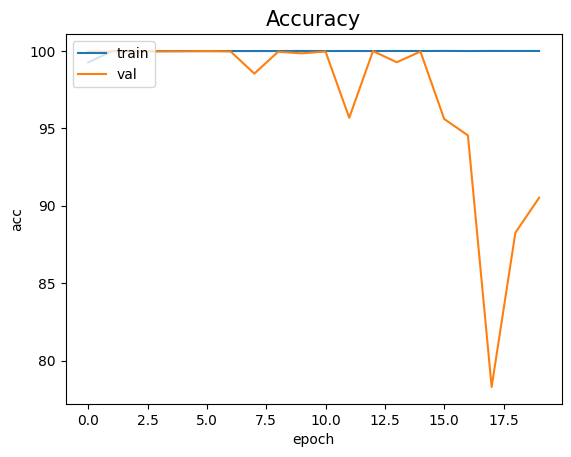

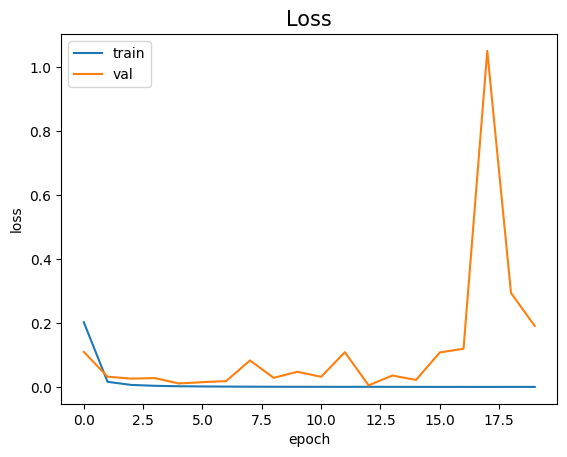

In [ ]:

def plotAcc(acc):
    plt.title("Accuracy",fontsize=15)
    plt.plot(acc['train'])
    plt.plot(acc['val'])
    plt.ylabel('acc')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

def plotLoss(loss):
    plt.title("Loss",fontsize=15)
    plt.plot(loss['train'])
    plt.plot(loss['val'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

plotAcc(acc)
plotLoss(loss)

In [ ]:
print(list ( new1.children ( ) ))
print(list ( new1.children ( ) ) [ :-2 ])

[Linear(in_features=79, out_features=512, bias=True), Linear(in_features=512, out_features=256, bias=True), Linear(in_features=256, out_features=128, bias=True), Linear(in_features=128, out_features=64, bias=True), Linear(in_features=64, out_features=32, bias=True), ReLU(), BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), Linear(in_features=32, out_features=5, bias=True)]
[Linear(in_features=79, out_features=512, bias=True), Linear(in_features=512, out_features=256, bias=True), Linear(in_features=256, out_features=128, bias=True), Linear(in_features=128, out_features=64, bias=True), Linear(in_features=64, out_features=32, bias=True), ReLU()]


In [ ]:
# class BDPDNN2Classification (nn.Module ):
#   def __init__ ( self,baseModel,num_class ) :   #For DoS Attacks , num class=6
#     super ( BDPDNN2Classification , self ).__init__ ( )
#     # self.baseModel = nn.Sequential (* list ( baseModel.children ( ) ) [ :-2 ] )
#     self.baseModel = nn.Sequential (* list ( baseModel.children ( ) ) )
#     self.batchnorm1new = nn.BatchNorm1d(3)
#     self.ReLU = nn.ReLU( )
#     self.layer_new_out = nn.Linear(3,num_class)
#     torch.nn.init.ones_(self.layer_new_out.bias)
#     torch.nn.init.normal_(self.layer_new_out.weight)

#   def forward ( self , x ) :
#     for name , param in self.baseModel.named_parameters() :
#       if name == "0.weight" or name == "0.bias" :
#         param.requires_grad = False
#       if name == "1.weight" or name == "1.bias" :
#           param.requires_grad = False
#       if name == "2.weight" or name == "2.bias" :
#           param.requires_grad = True
#       if name == "3.weight" or name == "3.bias" :
#           param.requires_grad = True
#       if name == "4.weight" or name == "4.bias" :
#         param.requiresgrad = True
#     x = self.ReLU(self.batchnorm1new(self.baseModel(x)))
#     x = self.layer_new_out(x)
#     return x



  # def predict(model, train_loader, val_loader, test_loader, num_classes):
  #   device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  #   dataloaders = {
  #       'train': train_loader1,
  #       'val': val_loader1,
  #       'test': test_loader1
  #   }

  #   model.eval() # Prepares model for evaluation

  #   for phase in ['train', 'val', 'test']:
  #       correct = 0
  #       total = 0

  #       for inputs, labels in dataloaders[phase]:
  #           inputs, labels = inputs.to(device), labels.to(device)

  #           with torch.no_grad():
  #               outputs = model(inputs)
  #               _, predicted = torch.max(outputs.data, 1)

  #           total += labels.size(0)
  #           correct += (predicted == labels).sum().item()

  #       print(f'Accuracy of the network on {phase} data: %d %%' % (
  #           100 * correct / total))
# num_classes2 = 5 #usb classes
# nested3 = BDPDNN2Classification(baseModel=new1, num_class=num_classes2)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(nested3.parameters(), lr=0.001)
# epochs = 5
# train_loader1, val_loader1 #data of the new dataset
# nested21, acc, loss = training(nested3, epochs, train_loader, val_loader, criterion, optimizer, num_classes2)
# #predict(nested21, train_loader1, val_loader1, num_classes2)
# predict(nested21, train_loader1, val_loader1, test_loader1, num_classes2)
# plotAcc(acc)
# plotLoss(loss)